In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('income.csv')

In [ ]:
df.head(5)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [ ]:
df.rename(columns={'Age':'age','Income($)':'Income'},inplace=True)

In [ ]:
df.head(5)

,Name,age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [ ]:
df.drop("Name",axis=1,inplace=True)

In [ ]:
df.head(5)

,age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [ ]:
km=KMeans(n_clusters=3)

In [ ]:
cols=df[['age','Income']]

In [ ]:
y_predicted=km.fit_predict(cols)

In [ ]:
df['cluster']=y_predicted

In [ ]:
df.head()

,age,Income,cluster
0,27,70000,0
1,29,90000,0
2,29,61000,2
3,28,60000,2
4,42,150000,1


In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

In [ ]:
df1

,age,Income,cluster
0,27,70000,0
1,29,90000,0
19,39,80000,0
20,41,82000,0


In [ ]:
df2

,age,Income,cluster
4,42,150000,1
5,39,155000,1
6,41,160000,1
7,38,162000,1
8,36,156000,1
9,35,130000,1
10,37,137000,1


In [ ]:
df3

,age,Income,cluster
2,29,61000,2
3,28,60000,2
11,26,45000,2
12,27,48000,2
13,28,51000,2
14,29,49500,2
15,32,53000,2
16,40,65000,2
17,41,63000,2
18,43,64000,2


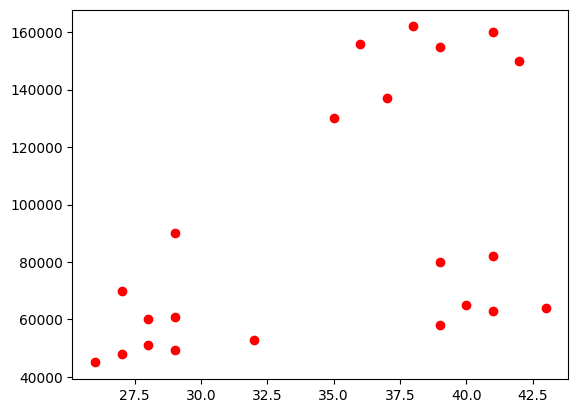

In [ ]:
plt.scatter(df['age'],df['Income'],color='red')

In [ ]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

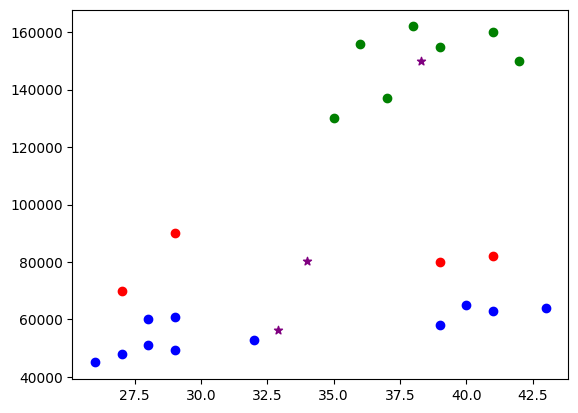

In [ ]:
plt.scatter(df1['age'],df1['Income'],color='red')
plt.scatter(df2['age'],df2['Income'],color='green')
plt.scatter(df3['age'],df3['Income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="*")

In [ ]:
df['Income']

0      70000
1      90000
2      61000
3      60000
4     150000
5     155000
6     160000
7     162000
8     156000
9     130000
10    137000
11     45000
12     48000
13     51000
14     49500
15     53000
16     65000
17     63000
18     64000
19     80000
20     82000
21     58000
Name: Income, dtype: int64

In [ ]:
g = MinMaxScaler()
g.fit(df[['Income']])
df['Income'] = g.transform(df[['Income']]).flatten()
print(df['Income'])



0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income, dtype: float64


In [ ]:
# Initialize the scaler
g = MinMaxScaler()
g.fit(df[['age']])
df['age'] = g.transform(df[['age']]).flatten()
print(df['age'])

0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: age, dtype: float64


In [ ]:
km=KMeans(n_clusters=3,init="k-means++",random_state=42)

In [ ]:
km.fit(cols)

KMeans(n_clusters=3, random_state=42)

In [ ]:
cols=df[['age','Income']]

In [ ]:
y_predicted=km.fit_predict(cols)

In [ ]:
df['cluster']=y_predicted

In [ ]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]

In [ ]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

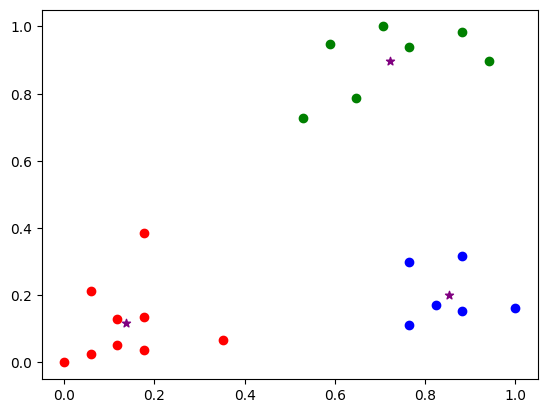

In [ ]:
plt.scatter(df1['age'],df1['Income'],color="green")
plt.scatter(df2['age'],df2['Income'],color="red")
plt.scatter(df3['age'],df3['Income'],color="blue")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color="purple",label="centroid")


In [ ]:
import warnings
warnings.filterwarnings('ignore',category=Warning)
import numpy as np
from sklearn.metrics import silhouette_score

Text(0.5, 1.0, 'SIlhouettePlot')

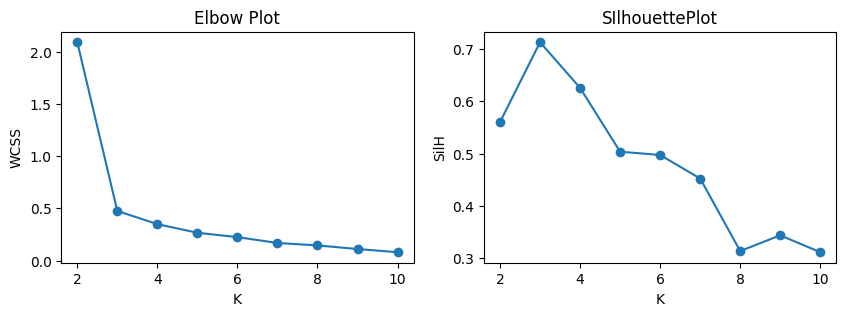

In [ ]:
sse=[]
silhouette_scores=[]
k_range=range(2,11)
cols=df[['age','Income']]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(cols)
  sse.append(km.inertia_)
  lables=km.labels_
  silhoette_avg=silhouette_score(cols,lables)
  silhouette_scores.append(silhoette_avg)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,3))
ax1.plot(k_range,sse,marker="o")
ax1.set_xlabel('K')
ax1.set_ylabel("WCSS")
ax1.set_title("Elbow Plot")

ax2.plot(k_range,silhouette_scores,marker="o")
ax2.set_xlabel("K")
ax2.set_ylabel("SilH")
ax2.set_title('SIlhouettePlot')


In [ ]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
data1=pd.DataFrame(data_scaled,columns=data.columns)

In [ ]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


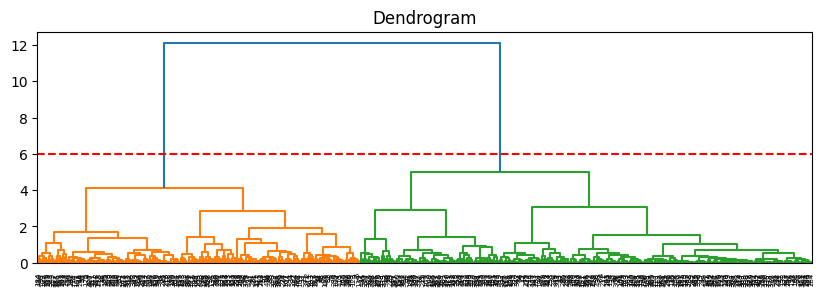

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,3))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(data1,method="ward"))
plt.axhline(y=6,color="r",linestyle="--")

In [ ]:
data1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


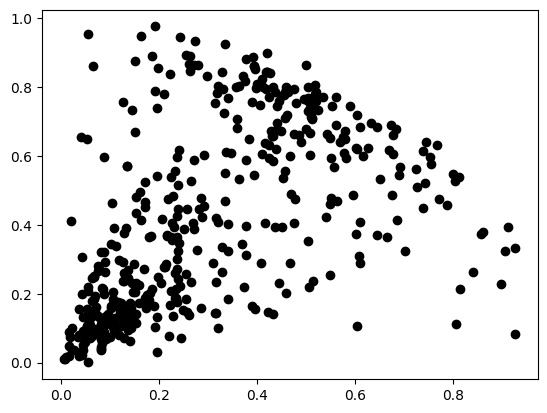

In [ ]:
plt.scatter(data1['Milk'],data1['Grocery'],color="black")

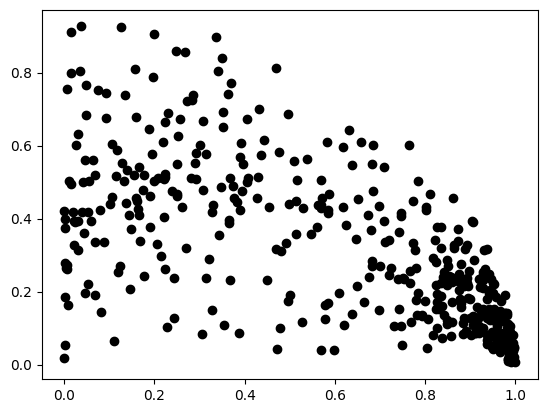

In [ ]:
plt.scatter(data1['Fresh'],data1['Milk'],color='Black')

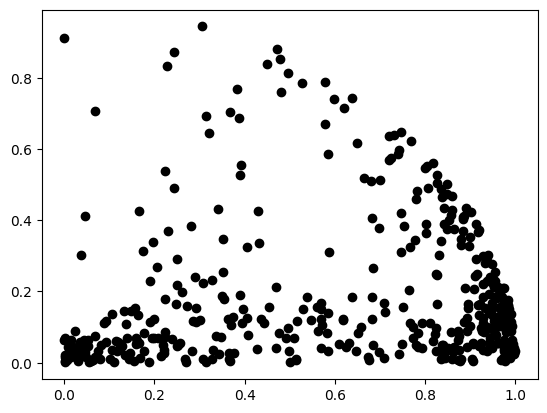

In [ ]:
plt.scatter(data1['Fresh'],data1['Frozen'],color='Black')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity="euclidean",linkage='ward')
cluster.fit(data1)


AgglomerativeClustering(affinity='euclidean')

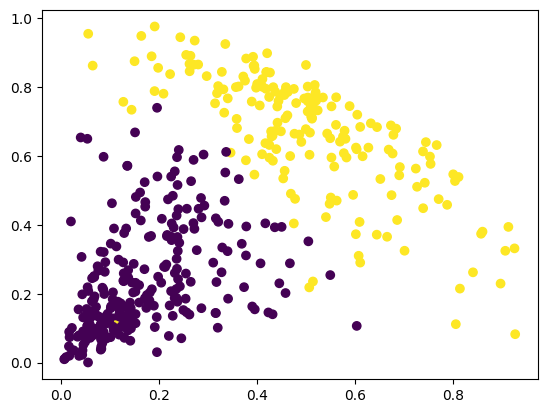

In [ ]:
plt.scatter(data1['Milk'],data1['Grocery'],c=cluster.labels_)

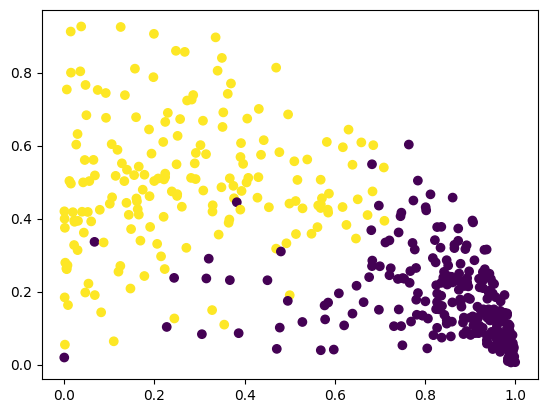

In [ ]:
plt.scatter(data1['Fresh'],data1['Milk'],c=cluster.labels_)

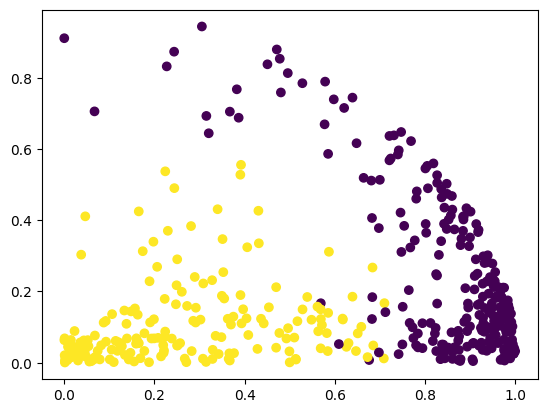

In [ ]:
plt.scatter(data1['Fresh'],data1['Frozen'],c=cluster.labels_)